In [7]:
using Plots, JSON

In [8]:
input = JSON.parsefile("sample.json")
res = JSON.parsefile("output.json")

Dict{String, Any} with 5 entries:
  "Trader bid price history" => Dict{String, Any}("Gary"=>Dict{String, Any}("Tr…
  "Grid revenue history"     => Dict{String, Any}("Grid total cost"=>543.435, "…
  "Trader ask price history" => Dict{String, Any}("Iris"=>Dict{String, Any}("Tr…
  "Agent revenue history"    => Dict{String, Any}("Gary"=>Dict{String, Any}("Lo…
  "Market clearing history"  => Dict{String, Any}("Total number"=>330, "Log"=>A…

In [9]:
T = 24*12*3
x = 1:T
solar = input["Supplies"]["Data"]["PV distribution"]
solars = [solar; solar; solar]
println(
    "200 = 1000min = 16:40 \n" * 
    "400 = 2000min = 33:20 = 9:20 \n" *
    "600 = 3000min = 50:00 = 2:00 \n" *
    "800 = 4000min = 66:40 = 18:40"
)

200 = 1000min = 16:40 
400 = 2000min = 33:20 = 9:20 
600 = 3000min = 50:00 = 2:00 
800 = 4000min = 66:40 = 18:40


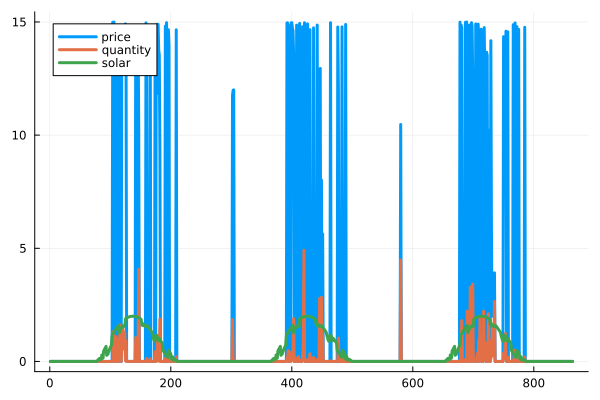

In [10]:
π = [0.0 for _ in x]
q = [0.0 for _ in x]
for hist in res["Market clearing history"]["Log"]
    idx = hist["Time counter"]
    π[idx] += hist["Price"] * hist["Quantity"]
    q[idx] += hist["Quantity"]
end
p = [π[idx] / (q[idx] == 0.0 ? 1.0 : q[idx]) for idx in x]
plot(x, [p, q, solars*2], label=["price" "quantity" "solar"], linewidth=3)

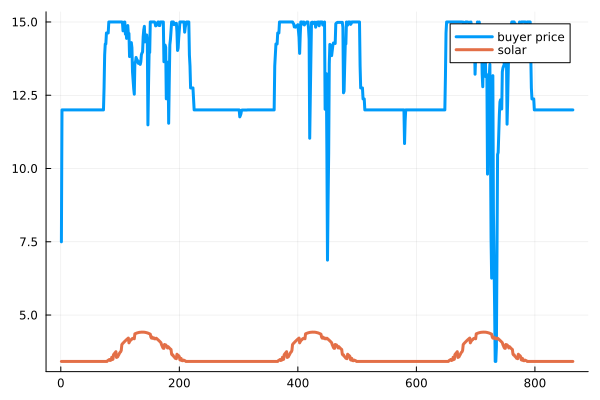

In [11]:
buyer_prices = [0.0 for _ in x]
n_buyers = 0
for (_, buyer) in res["Trader bid price history"]
    buyer_prices += buyer["Traders (buyers)"]
    n_buyers += 1
end
buyer_prices /= n_buyers
plot(x, 
    [buyer_prices, solars .+ minimum(buyer_prices)], 
    label=["buyer price" "solar"], linewidth=3)

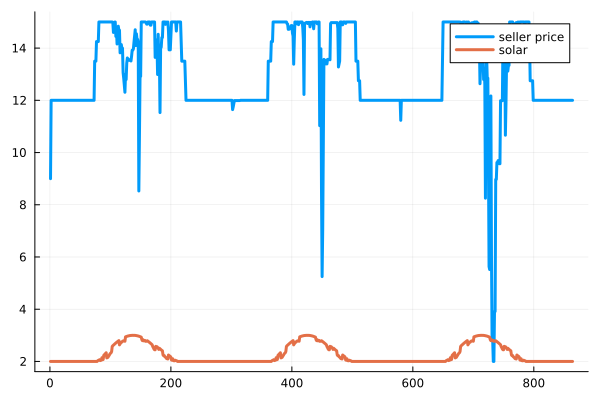

In [12]:
seller_prices = [0.0 for _ in x]
n_sellers = 0
for (_, seller) in res["Trader ask price history"]
    seller_prices += seller["Traders (sellers)"]
    n_sellers += 1
end
seller_prices /= n_sellers
plot(x, 
    [seller_prices, solars .+ minimum(seller_prices)], 
    label=["seller price" "solar"], linewidth=3)